In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2021-10-04 17:29:43.548128: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-04 17:29:43.548243: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


/kaggle/input/forest-cover-type-prediction/train.csv.zip
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv
/kaggle/input/forest-cover-type-prediction/sampleSubmission.csv.zip
/kaggle/input/forest-cover-type-prediction/test3.csv
/kaggle/input/forest-cover-type-prediction/train.csv
/kaggle/input/forest-cover-type-prediction/test.csv
/kaggle/input/forest-cover-type-prediction/test.csv.zip


In [2]:
# load data
train_df = pd.read_csv('/kaggle/input/forest-cover-type-prediction/train.csv')
test_df = pd.read_csv('/kaggle/input/forest-cover-type-prediction/test.csv')

In [3]:
# overlook of data
train_df.head(n=5)

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
train_df.shape

(15120, 56)

In [5]:
# An overlook of data
train_df.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [6]:
train_df.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [7]:
# Feature Engineering
train_df['Hillshade'] = train_df['Hillshade_9am'] + train_df['Hillshade_Noon'] + train_df['Hillshade_3pm']

In [8]:
def plot_features(features):
    for feature in features:
        plt.rcParams["figure.figsize"] = (10,3)
        for ctype in list(train_df['Cover_Type'].unique()):
            values = train_df.loc[train_df['Cover_Type'] == ctype][feature].values
            plt.scatter(x=values, y=np.arange(values.size), label=f"Cover type {ctype}")
        plt.title(feature)
        plt.legend()
        plt.show()

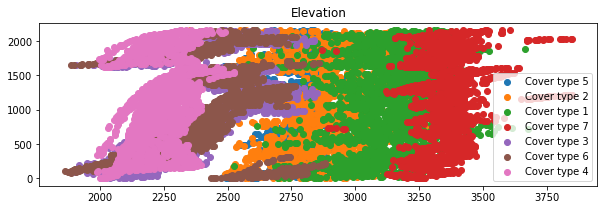

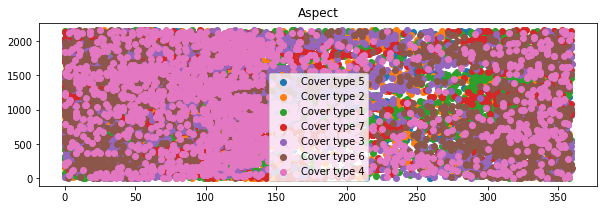

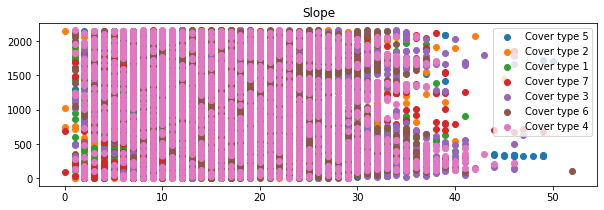

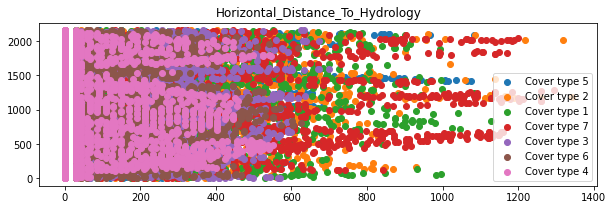

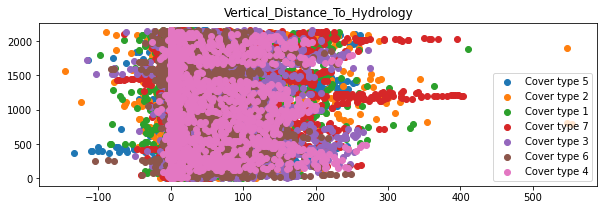

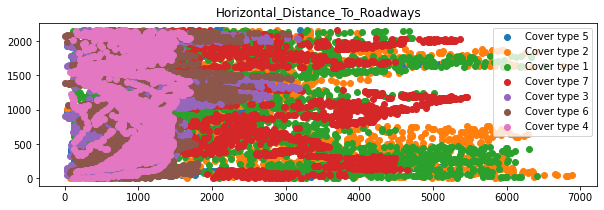

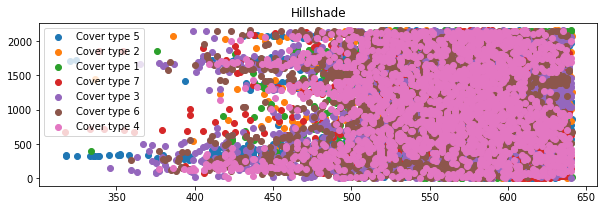

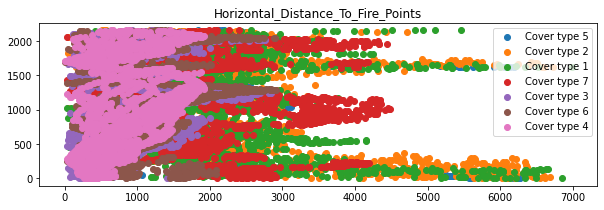

In [9]:
# Scatter plots for features with contnous values
plot_features(['Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade', 'Horizontal_Distance_To_Fire_Points'])

**Elevation, Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points seem to be good features to preprocess. Wilderness_Area and Soil_Types themselves act as one hot encoded features**

In [10]:
def normalize_column_min_max(df, column, minimum=None, maximum=None):
    if minimum is None or maximum is None:
        print("creating new min max ")
        minimum = df[column].min()
        maximum = df[column].max()
    else:
        print("using passed values")
    
    df[column] = (df[column]-minimum)/(maximum-minimum)
    return df, minimum, maximum

In [11]:
def normalize_column_std(df, column, mean=None, std=None):
    if mean is None or std is None:
        print("creating new min max ")
        mean = df[column].mean()
        std = df[column].std()
    else:
        print("using passed values")
    
    df[column] = (df[column]-mean)/std
    return df, mean, std

In [12]:
train_df, e_min, e_max = normalize_column_min_max(df=train_df.copy(), column='Elevation')
train_df, r_min, r_max = normalize_column_min_max(df=train_df.copy(), column='Horizontal_Distance_To_Roadways')
train_df, f_min, f_max = normalize_column_min_max(df=train_df.copy(), column='Horizontal_Distance_To_Fire_Points')

test_df, _, _ = normalize_column_min_max(df=test_df.copy(), column='Elevation', minimum=e_min, maximum=e_max)
test_df, _, _ = normalize_column_min_max(df=test_df.copy(), column='Horizontal_Distance_To_Roadways', minimum=r_min, maximum=r_max)
test_df, _, _ = normalize_column_min_max(df=test_df.copy(), column='Horizontal_Distance_To_Fire_Points', minimum=f_min, maximum=f_max)

creating new min max 
creating new min max 
creating new min max 
using passed values
using passed values
using passed values


In [13]:
train_df

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Hillshade
0,1,0.369084,51,3,258,0,0.074020,221,232,148,...,0,0,0,0,0,0,0,0,5,601
1,2,0.366062,56,2,212,-6,0.056604,220,235,151,...,0,0,0,0,0,0,0,0,5,606
2,3,0.473817,139,9,268,65,0.461538,234,238,135,...,0,0,0,0,0,0,0,0,2,607
3,4,0.464250,155,18,242,118,0.448476,238,238,122,...,0,0,0,0,0,0,0,0,2,598
4,5,0.368580,45,2,153,-1,0.056749,220,234,150,...,0,0,0,0,0,0,0,0,5,604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,15116,0.374622,243,23,258,7,0.095791,170,251,214,...,0,0,0,0,0,0,0,0,3,635
15116,15117,0.372608,121,19,633,195,0.089695,249,221,91,...,0,0,0,0,0,0,0,0,3,561
15117,15118,0.316717,134,25,365,117,0.048621,250,220,83,...,0,0,0,0,0,0,0,0,3,553
15118,15119,0.314199,167,28,218,101,0.035123,229,237,119,...,0,0,0,0,0,0,0,0,3,585


In [14]:

input_columns = ['Elevation',
       'Horizontal_Distance_To_Roadways', 
       'Hillshade', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

train_input = []
train_labels = []

for _, row in train_df.iterrows():
    input_ = []
    train_labels.append([row['Cover_Type']])
    for column in input_columns:
        input_.append(row[column])
    input_ = np.array(input_)
    train_input.append(input_)

In [15]:
train_input_shuffled, train_labels_shuffled = shuffle(train_input, train_labels)

train_input_shuffled = np.array(train_input_shuffled)
train_labels_shuffled = np.array(train_labels_shuffled)

In [16]:
onehot_encoder = OneHotEncoder(sparse=False)
train_labels_shuffled = onehot_encoder.fit_transform(train_labels_shuffled)
train_labels_shuffled

array([[0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [17]:
model = Sequential()
model.add(layers.Dense(64, input_shape=(None, 48), activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

2021-10-04 17:30:03.392914: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-04 17:30:03.395890: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-04 17:30:03.395946: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-04 17:30:03.395971: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0493ef29c7ac): /proc/driver/nvidia/version does not exist
2021-10-04 17:30:03.397069: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [18]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 64)          3136      
_________________________________________________________________
dense_1 (Dense)              (None, None, 128)         8320      
_________________________________________________________________
dense_2 (Dense)              (None, None, 256)         33024     
_________________________________________________________________
dense_3 (Dense)              (None, None, 512)         131584    
_________________________________________________________________
dense_4 (Dense)              (None, None, 256)         131328    
_________________________________________________________________
dense_5 (Dense)              (None, None, 128)         32896     
_________________________________________________________________
dense_6 (Dense)              (None, None, 64)          8

In [20]:
history = model.fit(train_input_shuffled, train_labels_shuffled, validation_split=0.2, epochs=100, batch_size=32, validation_batch_size=1)

2021-10-04 17:30:03.949903: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-04 17:30:03.961772: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2200155000 Hz


Epoch 1/100
378/378 [==============================] - 5s 11ms/step - loss: 2.5691 - accuracy: 0.1450 - val_loss: 1.9509 - val_accuracy: 0.1359
Epoch 2/100
378/378 [==============================] - 3s 9ms/step - loss: 1.9336 - accuracy: 0.1544 - val_loss: 1.4905 - val_accuracy: 0.2841
Epoch 3/100
378/378 [==============================] - 3s 9ms/step - loss: 1.4468 - accuracy: 0.3226 - val_loss: 1.2433 - val_accuracy: 0.3902
Epoch 4/100
378/378 [==============================] - 3s 9ms/step - loss: 1.2828 - accuracy: 0.3910 - val_loss: 1.1520 - val_accuracy: 0.5155
Epoch 5/100
378/378 [==============================] - 4s 9ms/step - loss: 1.1767 - accuracy: 0.4604 - val_loss: 1.1883 - val_accuracy: 0.4484
Epoch 6/100
378/378 [==============================] - 4s 9ms/step - loss: 1.1161 - accuracy: 0.4846 - val_loss: 1.0268 - val_accuracy: 0.5691
Epoch 7/100
378/378 [==============================] - 4s 9ms/step - loss: 1.0575 - accuracy: 0.5199 - val_loss: 1.2308 - val_accuracy: 0.451

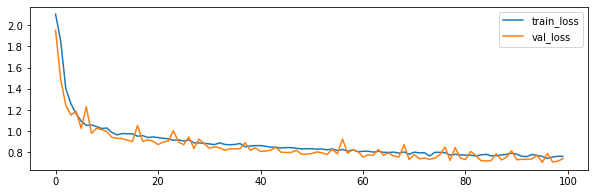

In [21]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

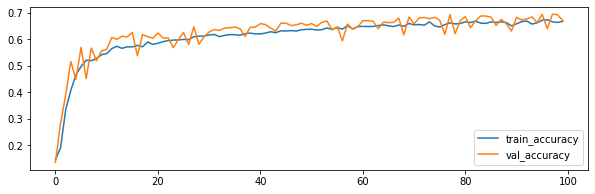

In [22]:
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()